In [1]:
import pandas as pd
import matplotlib.pyplot as plt
from datetime import datetime
from common.utils import plot_temperatures

folder = "dorn"
weather_file = "weather_data_raw.csv"

# week 1
# start_date = "2021-07-19 00:00:00"
# end_date = "2021-08-08 00:00:00"

# week 2
# start_date = "2021-11-01 00:00:00"
# end_date = "2021-11-08 00:00:00"

# week 3
start_date = "2021-10-18 00:00:00"
end_date = "2021-10-25 00:00:00"


df_zones = pd.DataFrame(
    columns=["Outside", "Zone 1", "Zone 2"],
    index=pd.date_range(start_date, end_date, freq='15T')
)



# Weather data

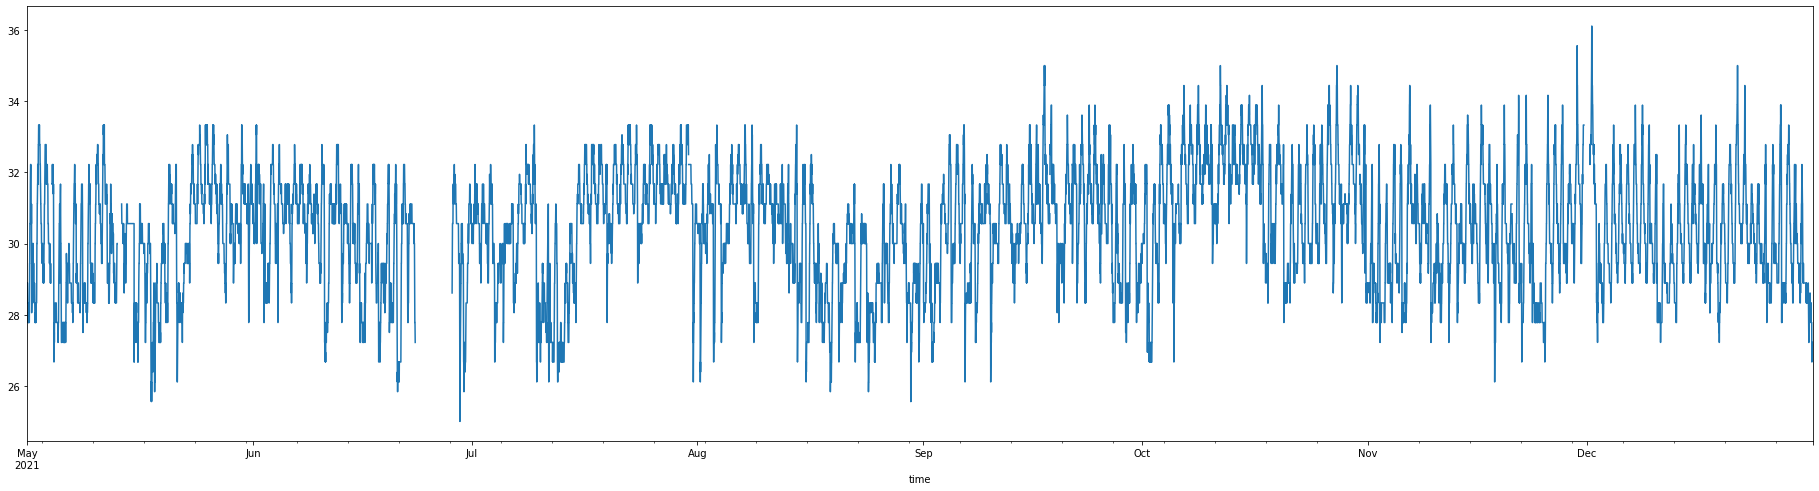

                           rh_out  t_out  month  hour  day
time                                                      
2021-10-18 00:00:00+08:00    60.5  29.72     10     0    0
2021-10-18 00:15:00+08:00    61.0  29.44     10     0    0
2021-10-18 00:30:00+08:00    60.5  29.44     10     0    0
2021-10-18 00:45:00+08:00    60.0  29.44     10     0    0
2021-10-18 01:00:00+08:00    59.5  29.44     10     1    0
...                           ...    ...    ...   ...  ...
2021-10-24 23:00:00+08:00    56.0  30.28     10    23    6
2021-10-24 23:15:00+08:00    56.0  30.00     10    23    6
2021-10-24 23:30:00+08:00    56.5  30.00     10    23    6
2021-10-24 23:45:00+08:00    57.0  30.00     10    23    6
2021-10-25 00:00:00+08:00    57.0  30.00     10     0    0

[673 rows x 5 columns]
<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 673 entries, 2021-10-18 00:00:00+08:00 to 2021-10-25 00:00:00+08:00
Freq: 15T
Data columns (total 5 columns):
 #   Column  Non-Null Count  Dtype  
---  ----

In [2]:
df_weather = pd.read_csv(
    f"data/{folder}/{weather_file}",
    index_col="time",
    parse_dates=True,
    infer_datetime_format=True,
)

df_weather = df_weather.rename(
    columns={"purpleair.humidity": "rh_out", "purpleair.temperature": "t_out"}
)
df_weather["rh_out"] += 4  # purpleair sensor correction

df_weather = df_weather.resample("15min").mean()

df_weather["month"] = df_weather.index.month
df_weather["hour"] = df_weather.index.hour
df_weather["day"] = df_weather.index.weekday

df_weather["t_out"].plot(figsize=(32, 8))
plt.show()

df_weather = df_weather[(df_weather.index >= start_date) & (df_weather.index <= end_date)]
df_zones["Outside"] = list(df_weather["t_out"])

print(df_weather)
print(df_weather.info())

df_weather.to_csv(f"data/{folder}/weather_data.csv")

# Operational indoor data

## Zone 1

In [3]:
indoor_file= "Zone_1_raw.csv"

Index(['\\WIN-DVHLUKOTMRV\SDE4 Analysis\IEQ Awair\12575|Temp',
       '\\WIN-DVHLUKOTMRV\SDE4 Analysis\IEQ Awair\12575|Humidity',
       '\\WIN-DVHLUKOTMRV\SDE4 Analysis\VAV\Level 3 Beehub|SDE4 Beehub VAV-L3-02 Airflow',
       '\\WIN-DVHLUKOTMRV\SDE4 Analysis\VAV\Level 3 Beehub|SDE4 Beehub VAV-L3-03 Airflow',
       '\\WIN-DVHLUKOTMRV\SDE4 Analysis\VAV\Level 3 Beehub|Thermostat Setpoint',
       '\\WIN-DVHLUKOTMRV\SDE4 Analysis\VAV\Level 3 Beehub|Room Temperature'],
      dtype='object')


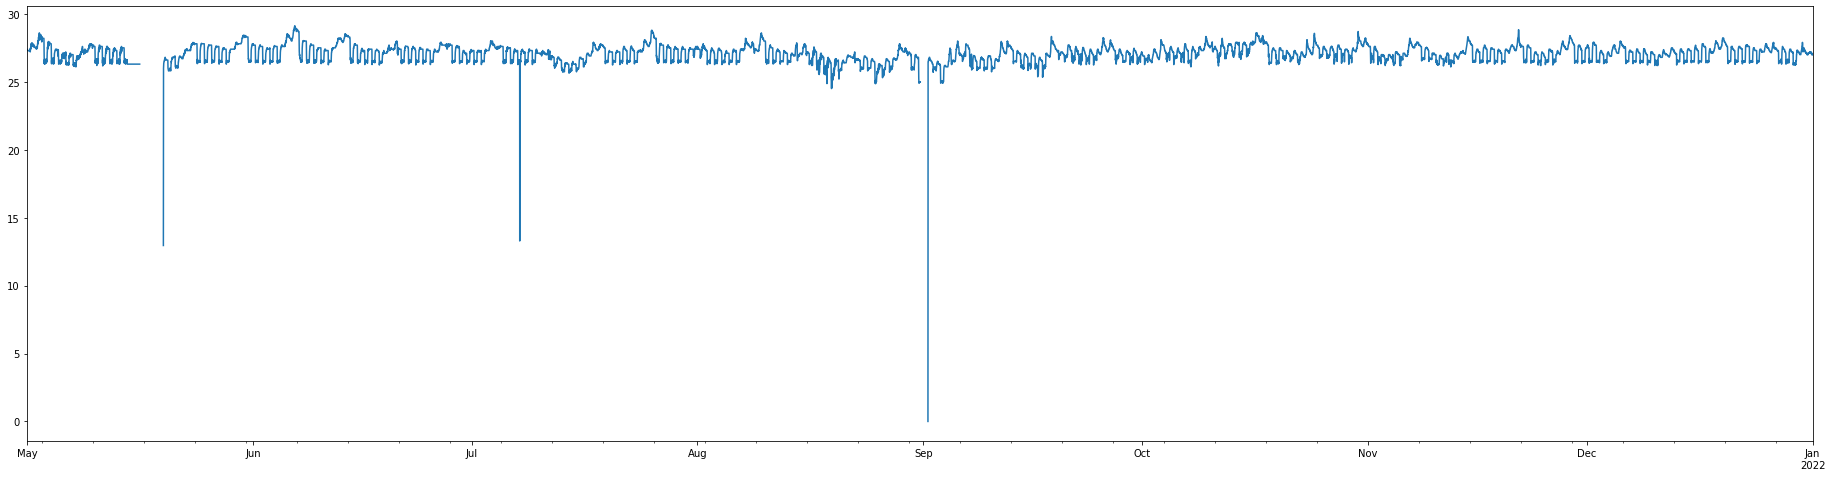

                     t_in_sensor      rh_in  air_flow_1  air_flow_2  t_set  \
2021-10-18 00:00:00    27.922975  83.445328   11.215814   31.919266   27.0   
2021-10-18 00:15:00    28.106676  82.588842    5.608140   31.919558   27.0   
2021-10-18 00:30:00    28.123513  82.453898    5.608233   28.371915   27.0   
2021-10-18 00:45:00    28.151485  82.189987   11.217028   28.370733   27.0   
2021-10-18 01:00:00    28.168889  82.085739   20.926582   28.371796   27.0   
...                          ...        ...         ...         ...    ...   
2021-10-24 23:00:00    28.117109  78.323438    0.000000    4.715379   27.0   
2021-10-24 23:15:00    28.139088  78.381238    0.000000    0.000000   27.0   
2021-10-24 23:30:00    28.171897  78.470248    0.000000    7.033965   27.0   
2021-10-24 23:45:00    28.172094  78.542671    0.000000    7.093939   27.0   
2021-10-25 00:00:00    28.089811  79.031451    0.000000    0.000000   27.0   

                          t_in  month  hour  day  
2021-10-18 0

In [4]:
df_data = pd.read_csv(
    f"data/{folder}/{indoor_file}",
    index_col=0,
    parse_dates=True,
    infer_datetime_format=True,
)
# make sure columns are float
cols = df_data.columns[df_data.dtypes.eq('object')]
df_data[cols] = df_data[cols].apply(pd.to_numeric, errors='coerce')
print(df_data.columns)
df_data.columns = ["t_in_sensor", "rh_in", "air_flow_1", "air_flow_2", "t_set", "t_in"]
# t_in_sensor = indoor temperature from an AWAIR sensor
# t_in = indoor temperature from VAV
df_data = df_data.resample("15min").mean()
df_data["month"] = df_data.index.month
df_data["hour"] = df_data.index.hour
df_data["day"] = df_data.index.weekday

df_data["t_in"].plot(figsize=(32, 8))
plt.show()

df_data = df_data[(df_data.index >= start_date) & (df_data.index <= end_date)]

df_zones["Zone 1"] = df_data["t_in"]

print(df_data)
print(df_data.info())

df_data.to_csv(f"data/{folder}/Zone_1.csv")

## Zone 2

In [5]:
indoor_file= "Zone_2_raw.csv"

                    \\WIN-DVHLUKOTMRV\SDE2\ACMV\VAV2-16|Temp  \
2021-03-01 00:00:00                                Comm Fail   
2021-03-01 00:05:00                                Comm Fail   
2021-03-01 00:10:00                                Comm Fail   
2021-03-01 00:15:00                                Comm Fail   
2021-03-01 00:20:00                                Comm Fail   

                    \\WIN-DVHLUKOTMRV\SDE2\ACMV\VAV2-17|Temp  
2021-03-01 00:00:00                                Comm Fail  
2021-03-01 00:05:00                                Comm Fail  
2021-03-01 00:10:00                                Comm Fail  
2021-03-01 00:15:00                                Comm Fail  
2021-03-01 00:20:00                                Comm Fail  
Index(['\\WIN-DVHLUKOTMRV\SDE2\ACMV\VAV2-16|Temp', '\\WIN-DVHLUKOTMRV\SDE2\ACMV\VAV2-17|Temp'], dtype='object')


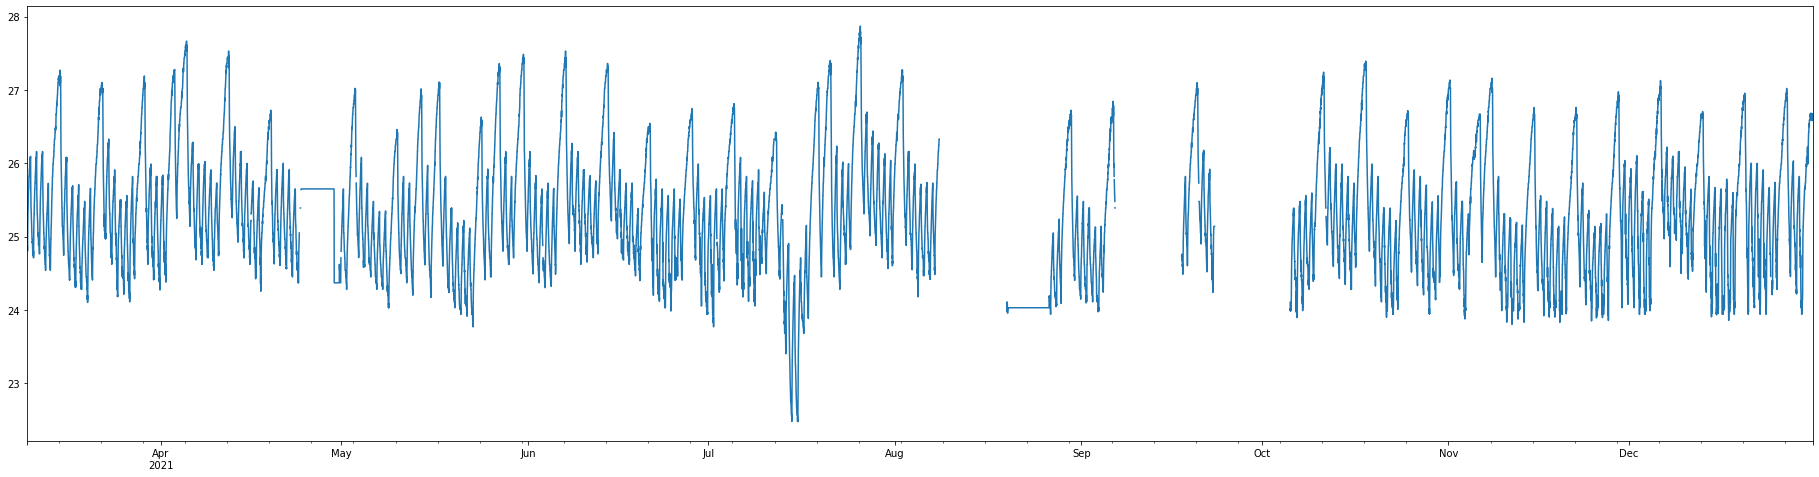

                          t_in     t_in_2  month  hour  day
2021-10-18 00:00:00  27.270000  26.420000     10     0    0
2021-10-18 00:15:00  27.270000  26.420000     10     0    0
2021-10-18 00:30:00  27.292128  26.420000     10     0    0
2021-10-18 00:45:00  27.337889  26.420000     10     0    0
2021-10-18 01:00:00  27.337905  26.466997     10     1    0
...                        ...        ...    ...   ...  ...
2021-10-24 23:00:00  26.505712  25.730000     10    23    6
2021-10-24 23:15:00  26.580715  25.730000     10    23    6
2021-10-24 23:30:00  26.590000  25.730000     10    23    6
2021-10-24 23:45:00  26.590000  25.730000     10    23    6
2021-10-25 00:00:00  26.590000  25.747624     10     0    0

[673 rows x 5 columns]
<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 673 entries, 2021-10-18 00:00:00 to 2021-10-25 00:00:00
Freq: 15T
Data columns (total 5 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   t_in    673 non-null    fl

In [6]:
dateparse = lambda x: datetime.strptime(x, '%y/%m/%d %H:%M')

df_data = pd.read_csv(
    f"data/{folder}/{indoor_file}",
    index_col=0,
    parse_dates=True,
    date_parser = dateparse
    # infer_datetime_format=True,
)

print(df_data.head())

# make sure columns are float
cols = df_data.columns[df_data.dtypes.eq('object')]
df_data[cols] = df_data[cols].apply(pd.to_numeric, errors='coerce')

# drop rows with nan values
df_data = df_data.dropna(axis=0)

print(df_data.columns)
df_data.columns = ["t_in", "t_in_2"]
# t_in = indoor temperature from VAV

df_data = df_data.resample("15min").mean()
df_data["month"] = df_data.index.month
df_data["hour"] = df_data.index.hour
df_data["day"] = df_data.index.weekday

df_data["t_in"].plot(figsize=(32, 8))
plt.show()

df_data = df_data[(df_data.index >= start_date) & (df_data.index <= end_date)]
df_data = df_data.dropna(axis=0)

df_zones["Zone 2"] = df_data["t_in"]

print(df_data)
print(df_data.info())

df_data.to_csv(f"data/{folder}/Zone_2.csv")

## All dataframes

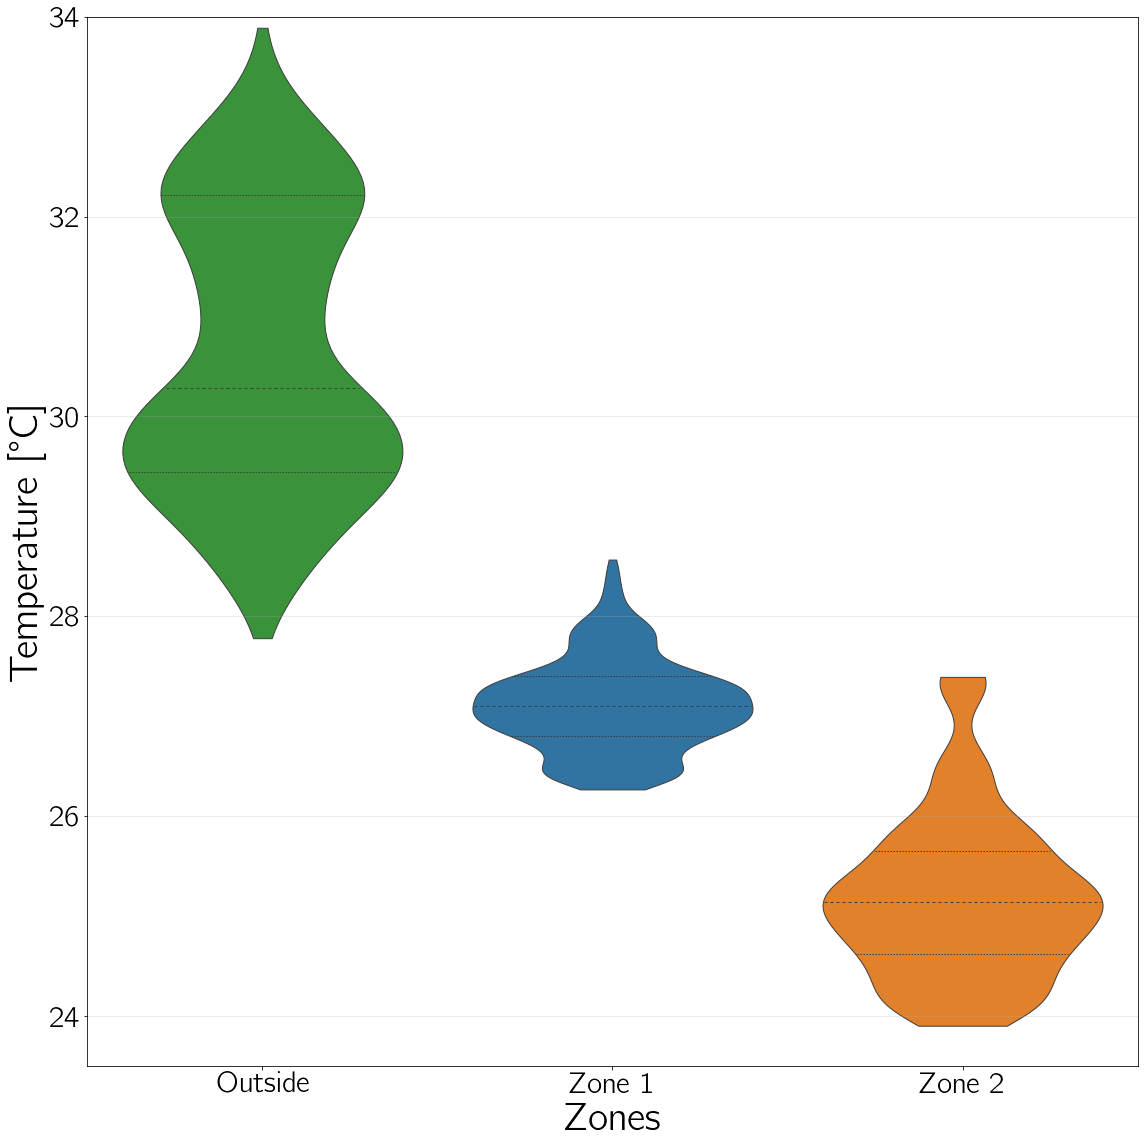

In [7]:
plot_temperatures(df_zones, ylim=(23.5, 34), fontsize=40, size=(16, 16))
